In [7]:
import pandas as pd
print(pd.__version__)


2.1.1


In [40]:
import pandas as pd
import serial
import re
from time import sleep, time
import datetime

# Set up the serial connection (adjust COM port and baud rate according to your setup)
ser = serial.Serial('COM3', 9600)  # Replace 'COM3' with your Arduino's serial port
sleep(2)  # Wait for the connection to establish

# Prepare the DataFrame
columns = ['DateTime', 'SecondsSinceStart', 'Slot1ID', 'Slot2ID', 'Slot3ID', 
           'Slot1Sensor', 'Slot2Sensor', 'Slot3Sensor', 'MQ4Value', 'MQ5Value', 
           'MQ6Value', 'MQ9Value', 'DHTHumidity', 'DHTTemperature', 'BMPPressure', 
           'BMPTemperature', 'NEWTEMPTemperature', 'MotionValue', 'DecibelValue']
#data = {col: [] for col in columns}
df = pd.DataFrame(columns=columns)

start_time = time()

def parse_serial_data(line):
    readings = {}
    slots = line.split(';')
    for slot in slots:
        if "Slot" in slot:
            slot_number = slot.split()[0]
            id_match = re.search(r'Id: (\d+), ([\w\s]+)', slot)
            if id_match:
                readings[f'{slot_number}ID'] = id_match.group(1)
                sensor = id_match.group(2).strip()
                readings[f'{slot_number}Sensor'] = sensor
                if sensor != "None":
                    if sensor == "Motion":
                        readings['MotionValue'] = re.search(r'Motion, Value: (\d+)', slot).group(1)
                    elif sensor == "DB":
                        readings['DecibelValue'] = re.search(r'DB, Value: (\d+)', slot).group(1)
                    elif sensor == "MQ9":
                        readings['MQ9Value'] = re.search(r'MQ9, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ4":
                        readings['MQ4Value'] = re.search(r'MQ4, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ5":
                        readings['MQ5Value'] = re.search(r'MQ5, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "MQ6":
                        readings['MQ6Value'] = re.search(r'MQ6, Gas Value: (\d+)', slot).group(1)
                    elif sensor == "DHT":
                        readings['DHTHumidity'] = re.search(r'Humidity: ([\d.]+)', slot).group(1)
                        readings['DHTTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                    elif sensor == "BMP":
                        readings['BMPPressure'] = re.search(r'Pressure: ([\d.]+)', slot).group(1)
                        readings['BMPTemperature'] = re.search(r'Temp: ([\d.]+)', slot).group(1)
                    elif sensor == "New Temp":
                        readings['NEWTEMPTemperature'] = re.search(r'Value: ([\d.]+)', slot).group(1)
            else:
                readings[f'{slot_number}Sensor'] = 'None'
    print("Parsed data:", readings)  # Debug print
    return readings

try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            parsed_data = parse_serial_data(line)
            current_time = datetime.datetime.now()
            elapsed_time = time() - start_time
            parsed_data['DateTime'] = current_time
            parsed_data['SecondsSinceStart'] = elapsed_time
            df = pd.concat([df, pd.DataFrame([parsed_data])], ignore_index=True)
except KeyboardInterrupt:
    ser.close()
    print("Serial connection closed.")

# Optional: Save DataFrame to a CSV file
df.to_csv('sensor_readings9.csv', index=False)

Parsed data: {}
Parsed data: {'Slot2ID': '377', 'Slot2Sensor': 'None', 'Slot3ID': '365', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '362', 'Slot1Sensor': 'None', 'Slot2ID': '369', 'Slot2Sensor': 'None', 'Slot3ID': '355', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '381', 'Slot1Sensor': 'None', 'Slot2ID': '389', 'Slot2Sensor': 'None', 'Slot3ID': '378', 'Slot3Sensor': 'None'}


C:\Users\jonas\AppData\Local\Temp\ipykernel_32776\3141523603.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([parsed_data])], ignore_index=True)


Parsed data: {'Slot1ID': '360', 'Slot1Sensor': 'None', 'Slot2ID': '370', 'Slot2Sensor': 'None', 'Slot3ID': '358', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '323', 'Slot1Sensor': 'None', 'Slot2ID': '335', 'Slot2Sensor': 'None', 'Slot3ID': '324', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '340', 'Slot1Sensor': 'None', 'Slot2ID': '351', 'Slot2Sensor': 'None', 'Slot3ID': '340', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '361', 'Slot1Sensor': 'None', 'Slot2ID': '371', 'Slot2Sensor': 'None', 'Slot3ID': '360', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '364', 'Slot1Sensor': 'None', 'Slot2ID': '373', 'Slot2Sensor': 'None', 'Slot3ID': '362', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '336', 'Slot1Sensor': 'None', 'Slot2ID': '347', 'Slot2Sensor': 'None', 'Slot3ID': '337', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '339', 'Slot1Sensor': 'None', 'Slot2ID': '350', 'Slot2Sensor': 'None', 'Slot3ID': '339', 'Slot3Sensor': 'None'}
Parsed data: {'Slot1ID': '359', 'Slot1Sen

In [122]:
df.to_csv('sensor_readings6.csv', index=False)

In [123]:
df2

,DateTime,SecondsSinceStart,Slot1ID,Slot2ID,Slot3ID,Slot1Sensor,Slot2Sensor,Slot3Sensor,MQ4Value,MQ5Value,MQ6Value,MQ9Value,DHTHumidity,DHTTemperature,BMPPressure,BMPTemperature,NEWTEMPTemperature,MotionValue,DecibelValue
0,2024-02-06 17:18:44.236514,0.005986,362,369,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-06 17:18:44.239088,0.008560,381,389,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-06 17:18:45.211476,0.980948,360,370,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-06 17:18:46.219847,1.989319,323,335,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-06 17:18:47.222651,2.992123,340,351,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,2024-02-06 18:00:55.109339,2530.878811,804,37,281,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.81,23.35,NaN,0.0,NaN
2387,2024-02-06 18:00:56.189645,2531.959117,804,37,281,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.81,23.35,NaN,0.0,NaN
2388,2024-02-06 18:00:57.267271,2533.036743,804,37,281,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.82,23.35,NaN,0.0,NaN
2389,2024-02-06 18:00:58.349102,2534.118574,804,36,281,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.84,23.35,NaN,0.0,NaN


In [120]:
import pandas as pd
df2 = pd.read_csv('sensor_readings9.csv')

In [48]:
df2

,DateTime,SecondsSinceStart,Slot1ID,Slot2ID,Slot3ID,Slot1Sensor,Slot2Sensor,Slot3Sensor,MQ4Value,MQ5Value,MQ6Value,MQ9Value,DHTHumidity,DHTTemperature,BMPPressure,BMPTemperature,NEWTEMPTemperature,MotionValue,DecibelValue
0,2024-02-06 17:18:44.230528,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-06 17:18:44.233522,0.002994,NaN,377.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-06 17:18:44.236514,0.005986,362.0,369.0,355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-06 17:18:44.239088,0.008560,381.0,389.0,378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-06 17:18:45.211476,0.980948,360.0,370.0,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2024-02-06 18:00:55.109339,2530.878811,804.0,37.0,281.0,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.81,23.35,NaN,0.0,NaN
2389,2024-02-06 18:00:56.189645,2531.959117,804.0,37.0,281.0,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.81,23.35,NaN,0.0,NaN
2390,2024-02-06 18:00:57.267271,2533.036743,804.0,37.0,281.0,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.82,23.35,NaN,0.0,NaN
2391,2024-02-06 18:00:58.349102,2534.118574,804.0,36.0,281.0,Motion,DHT,BMP,NaN,NaN,NaN,NaN,15.6,23.2,985.84,23.35,NaN,0.0,NaN


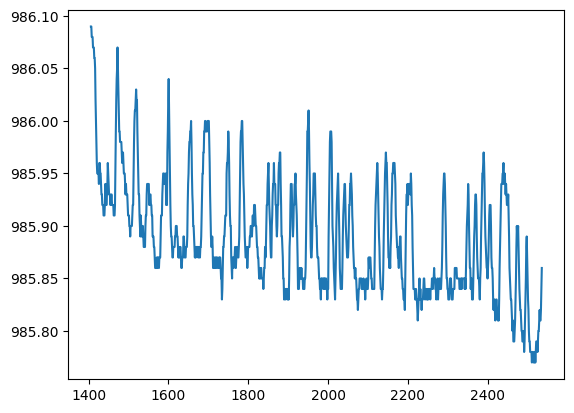

In [56]:
#plt.plot(df2['SecondsSinceStart'],df2['NEWTEMPTemperature'],label='Temperature [grader C]')
plt.plot(df2['SecondsSinceStart'],df2['BMPPressure'],label='Temperature [grader C]')

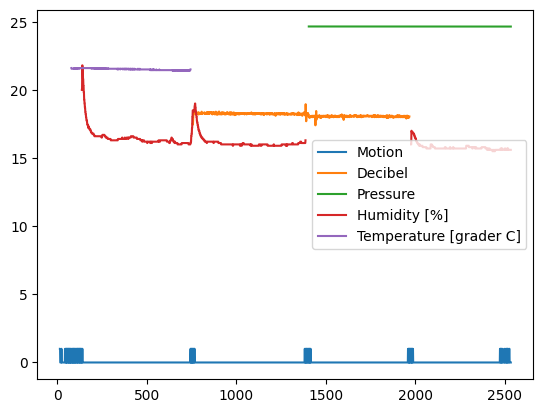

In [59]:
import matplotlib.pyplot as plt

#plt.plot(df3['SecondsElapsed'],df2['BMPPressure']/1,label='Pressure')
plt.plot(df2['SecondsSinceStart'],df2['MotionValue'],label='Motion')
plt.plot(df2['SecondsSinceStart'],df2['DecibelValue']/20,label='Decibel')
plt.plot(df2['SecondsSinceStart'],df2['BMPPressure']/40,label='Pressure')
#plt.plot(df2['SecondsSinceStart'],df2['DHTTemperature'],label='DHT Temp')
#plt.plot(df2['SecondsSinceStart'],df2['BMPTemperature'],label='BMP Temp')
plt.plot(df2['SecondsSinceStart'],df2['DHTHumidity'],label='Humidity [%]')
plt.plot(df2['SecondsSinceStart'],df2['NEWTEMPTemperature']/20,label='Temperature [grader C]')
plt.legend()

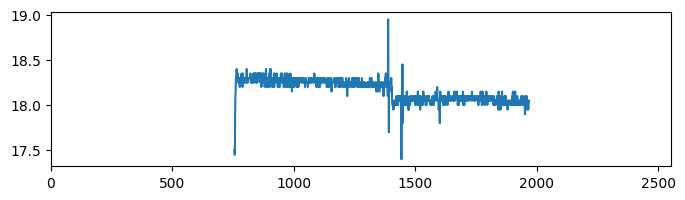

In [66]:
plt.figure(figsize=(8, 2))
plt.plot(df2['SecondsSinceStart'],df2['DecibelValue']/20,label='Decibel')
plt.xlim(0,2550)
plt.show()

In [134]:
import string

time = df2['SecondsSinceStart']
slot1 = df2['Slot1Sensor']
slot2 = df2['Slot2Sensor']
slot3 = df2['Slot3Sensor']

connections = dict()

previous = "None"
iter = 1
for slot in [slot1, slot2, slot3]:
    for i in range(len(slot)):
        current = slot[i]
        if current != "None" and not pd.isna(current):
            if previous in ["None", None] or pd.isna(previous):
                key = str(time[i])
                item = "Slot "+str(iter)+": " + str(slot[i])
                connections[key]=item
        previous = current
    iter+=1

connections


{'14.06753420829773': 'Slot 1: Motion',
 '78.16398048400879': 'Slot 2: New Temp',
 '755.7864818572998': 'Slot 2: DB',
 '1977.4416675567627': 'Slot 2: DHT',
 '136.94260621070862': 'Slot 3: DHT',
 '1405.7412643432615': 'Slot 3: BMP'}

In [ ]:
events = {'14.06753420829773': 'Slot 1: Motion sensor connected',
 '78.16398048400879': 'Slot 2: Temperature sensor connected',
 '755.7864818572998': 'Slot 2: Sound level sensor connected',
 '1977.4416675567627': 'Slot 2: Humidity sensor connected',
 '136.94260621070862': 'Slot 3: Humidity sensor connected',
 '1405.7412643432615': 'Slot 3: Pressure sensor connected'}

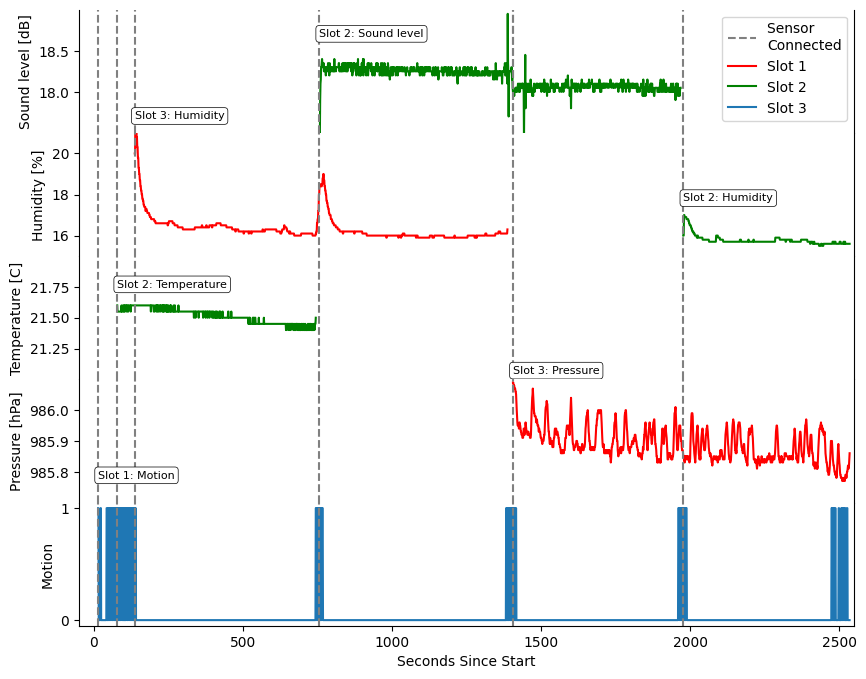

In [187]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
plt.subplots_adjust(hspace=0)

# Plot the first set of data on the first subplot
ax1.plot(df2['SecondsSinceStart'], df2['DecibelValue']/20, color='green')
ax1.set_xlim(-50, 2550)  # Set x limits if needed, though they are shared
ax1.set_ylabel('Sound level [dB]')  # Set the label for the y-axis
ax1.set_ylim(17.5,19.0)
ax1.set_yticks([18,18.5])
#ax1.set_xticks([0,0])


# Plot the second set of data on the second subplot, you can adjust this as needed
ax2.plot(df2['SecondsSinceStart'].head(1500), df2['DHTHumidity'].head(1500), label='Slot 1', color='red')
ax2.plot(df2['SecondsSinceStart'].tail(1000), df2['DHTHumidity'].tail(1000), color='green')
ax2.set_ylabel('Humidity [%]')  # Set the label for the y-axis
ax2.set_ylim(15,21)
ax2.set_yticks([16,18,20])
#ax2.set_xticks([0,0])

ax3.plot(df2['SecondsSinceStart'], df2['NEWTEMPTemperature']/20, label='Slot 2',color='green')
ax3.set_ylabel('Temperature [C]')  # Set the label for the y-axis
ax3.set_ylim(21,22)
ax3.set_yticks([21.25,21.50,21.75])
#ax3.set_xticks([0,0])


ax4.plot(df2['SecondsSinceStart'], df2['BMPPressure'], color='red')
ax4.set_ylabel('Pressure [hPa]')
ax4.set_ylim(985.7,986.1)
ax4.set_yticks([985.8,985.9,986.0])
#ax4.set_xticks([0,0])

ax5.plot(df2['SecondsSinceStart'], df2['MotionValue'], label='Slot 3')
#ax5.set_ylim(0,1)
#ax5.pyplot.locator_params(axis='y', nbins=2)
ax5.set_ylabel('Motion')
ax5.set_yticks([0,1])
ax4.annotate("Slot 1: Motion",xy=(14.06753420829773,985.8), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax3.annotate("Slot 2: Temperature",xy=(78.16398048400879,21.8), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax1.annotate("Slot 3: Humidity",xy=(136.94260621070862,17.75), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax1.annotate("Slot 2: Sound level",xy=(755.7864818572998,18.75), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax3.annotate("Slot 3: Pressure",xy=(1405.7412643432615,21.1), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax2.annotate("Slot 2: Humidity",xy=(1977.4416675567627,18), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax1.axvline(x=1405.7412643432615, color='grey',linestyle='--',label="Sensor \nConnected")

# Plot horizontal lines at the top of each subplot
#for ax in [ax1, ax2, ax3, ax4, ax5]:
#    ax.axhline(y=ax.get_ylim()[1], color='grey', linestyle='--')

# Plot the vertical line
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.axvline(x=14.06753420829773, color='grey', linestyle='--')
    ax.axvline(x=78.16398048400879, color='grey',linestyle='--')
    ax.axvline(x=755.7864818572998, color='grey',linestyle='--')
    ax.axvline(x=1977.4416675567627, color='grey',linestyle='--')
    ax.axvline(x=136.94260621070862, color='grey',linestyle='--')
    ax.axvline(x=1405.7412643432615, color='grey',linestyle='--')

handles, labels = [], []
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

#fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
ax1.legend(handles, labels, loc='upper right')
ax5.spines['bottom'].set_visible(True)

# Optionally, set a common x-label
plt.xlabel('Seconds Since Start')

# Show the plot
plt.show()

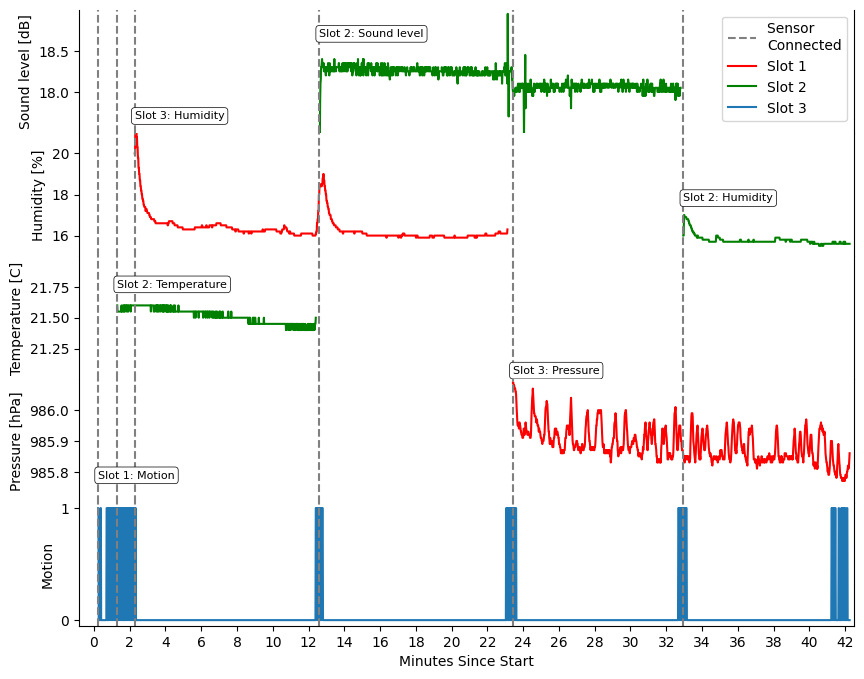

In [193]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
plt.subplots_adjust(hspace=0)

df2['MinutesSinceStart'] = df2['SecondsSinceStart'] / 60

# Define the x-limits in minutes and set x-ticks every 2 minutes
x_lim_minutes = (df2['MinutesSinceStart'].min(), df2['MinutesSinceStart'].max())
x_ticks = np.arange(x_lim_minutes[0], x_lim_minutes[1] + 2, 2)  # Every 2 minutes

# Set x-ticks for the last subplot (they are shared)
ax5.set_xticks(x_ticks)
ax5.set_xticklabels([f"{int(x)}" for x in x_ticks])

# Plot the first set of data on the first subplot
ax1.plot(df2['MinutesSinceStart'], df2['DecibelValue']/20, color='green')
ax1.set_xlim(-50/60, 2550/60)  # Set x limits if needed, though they are shared
ax1.set_ylabel('Sound level [dB]')  # Set the label for the y-axis
ax1.set_ylim(17.5,19.0)
ax1.set_yticks([18,18.5])
#ax1.set_xticks([0,0])


# Plot the second set of data on the second subplot, you can adjust this as needed
ax2.plot(df2['MinutesSinceStart'].head(1500), df2['DHTHumidity'].head(1500), label='Slot 1', color='red')
ax2.plot(df2['MinutesSinceStart'].tail(1000), df2['DHTHumidity'].tail(1000), color='green')
ax2.set_ylabel('Humidity [%]')  # Set the label for the y-axis
ax2.set_ylim(15,21)
ax2.set_yticks([16,18,20])
#ax2.set_xticks([0,0])

ax3.plot(df2['MinutesSinceStart'], df2['NEWTEMPTemperature']/20, label='Slot 2',color='green')
ax3.set_ylabel('Temperature [C]')  # Set the label for the y-axis
ax3.set_ylim(21,22)
ax3.set_yticks([21.25,21.50,21.75])
#ax3.set_xticks([0,0])


ax4.plot(df2['MinutesSinceStart'], df2['BMPPressure'], color='red')
ax4.set_ylabel('Pressure [hPa]')
ax4.set_ylim(985.7,986.1)
ax4.set_yticks([985.8,985.9,986.0])
#ax4.set_xticks([0,0])

ax5.plot(df2['MinutesSinceStart'], df2['MotionValue'], label='Slot 3')
#ax5.set_ylim(0,1)
#ax5.pyplot.locator_params(axis='y', nbins=2)
ax5.set_ylabel('Motion')
ax5.set_yticks([0,1])
ax4.annotate("Slot 1: Motion",xy=(14.06753420829773/60,985.8), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax3.annotate("Slot 2: Temperature",xy=(78.16398048400879/60,21.8), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax1.annotate("Slot 3: Humidity",xy=(136.94260621070862/60,17.75), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax1.annotate("Slot 2: Sound level",xy=(755.7864818572998/60,18.75), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax3.annotate("Slot 3: Pressure",xy=(1405.7412643432615/60,21.1), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax2.annotate("Slot 2: Humidity",xy=(1977.4416675567627/60,18), xytext=(0, 1),
                textcoords="offset points", ha='left', va='top', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", linewidth=0.5))
ax1.axvline(x=1405.7412643432615/60, color='grey',linestyle='--',label="Sensor \nConnected")

# Plot horizontal lines at the top of each subplot
#for ax in [ax1, ax2, ax3, ax4, ax5]:
#    ax.axhline(y=ax.get_ylim()[1], color='grey', linestyle='--')

# Plot the vertical line
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.axvline(x=14.06753420829773/60, color='grey', linestyle='--')
    ax.axvline(x=78.16398048400879/60, color='grey',linestyle='--')
    ax.axvline(x=755.7864818572998/60, color='grey',linestyle='--')
    ax.axvline(x=1977.4416675567627/60, color='grey',linestyle='--')
    ax.axvline(x=136.94260621070862/60, color='grey',linestyle='--')
    ax.axvline(x=1405.7412643432615/60, color='grey',linestyle='--')

handles, labels = [], []
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

#fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
ax1.legend(handles, labels, loc='upper right')
ax5.spines['bottom'].set_visible(True)

# Optionally, set a common x-label
plt.xlabel('Minutes Since Start')

# Show the plot
plt.show()